# Rainfall Weather Forecasting

Project Description


Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.


In [41]:
# importing the required dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# reading the dataset
rainfall_df=pd.read_csv('weatherAUS.csv')


In [71]:
#printing first 5 rows from the dataset
rainfall_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [72]:
# finding the total rows and columns in the dataset
rainfall_df.shape

(8425, 23)

here in the dataset there are 8425 rows and 23 columns.

In [73]:
# printing more details of dataset
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [74]:
# checking for any missing values in the dataset
rainfall_df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Here we can see many columns in the dataset have null values 


In [75]:
# handling the missing values
rainfall_df.replace(to_replace=' ',value=np.nan,inplace=True)

In [76]:
rainfall_df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [77]:
# removing the rows with null values 
rainfall_df.dropna(inplace=True)

In [78]:
rainfall_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,No
8382,2012-11-07,Darwin,26.2,33.3,0.0,6.0,5.9,N,54.0,ENE,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,No,Yes
8383,2012-11-08,Darwin,24.9,32.8,20.4,6.2,8.7,WNW,37.0,NNE,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,Yes,No
8384,2012-11-09,Darwin,25.5,33.1,0.0,4.8,7.1,SSE,37.0,E,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,No,No


In [79]:
# rechecking for the null values
rainfall_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

now there are no missing values and nan values in the dataset we can move forward

In [80]:
# finding the satistical values
rainfall_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


In [81]:
# Date column has high cardinality which poses several problems to the model in terms of efficiency 
#and dimensions of data increase when encoded to numerical data
rainfall_df['Date'] = pd.to_datetime(rainfall_df['Date'])
rainfall_df['year'] = rainfall_df['Date'].dt.year
rainfall_df['month'] = rainfall_df['Date'].dt.month
rainfall_df['day'] = rainfall_df['Date'].dt.day

rainfall_df.drop('Date', axis = 1, inplace = True)
rainfall_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
907,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,ESE,...,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,2009,3,10
908,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,S,...,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,2009,3,11
909,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,...,1020.1,5.0,7.0,21.0,24.5,Yes,No,2009,3,12
910,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,...,1016.6,2.0,5.0,23.3,26.4,No,No,2009,3,13
911,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,...,1012.8,1.0,1.0,24.0,25.9,No,Yes,2009,3,14


In [82]:

# Categorical features in Dataset:

categorical_features = [column_name for column_name in rainfall_df.columns if rainfall_df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)


Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [83]:
# numerical features in the dataset

numerical_features = [column_name for column_name in rainfall_df.columns if rainfall_df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

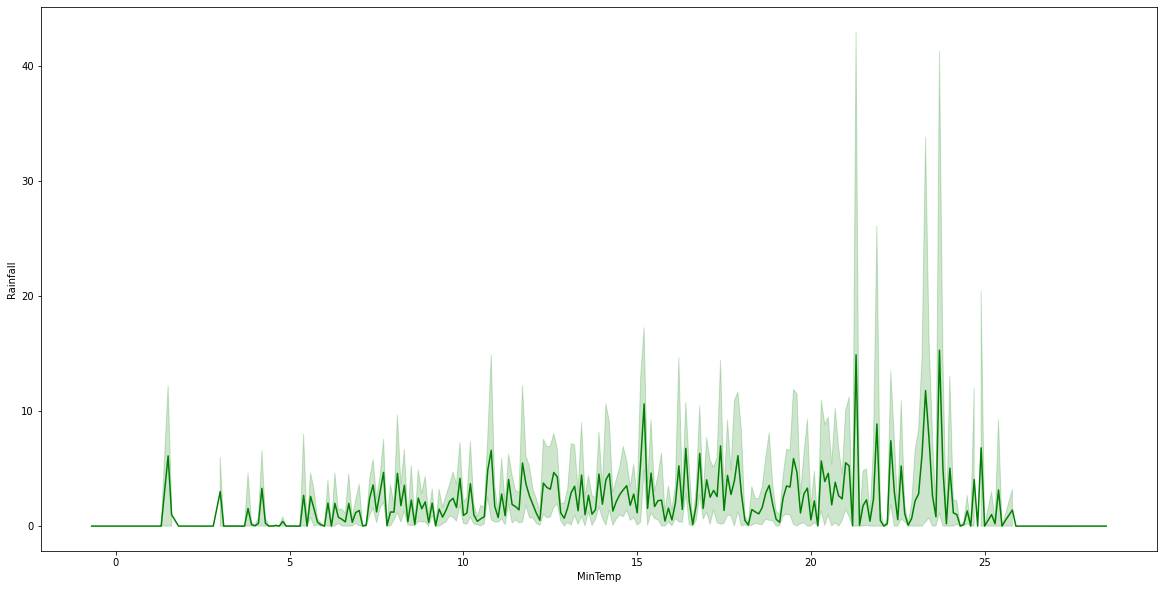

In [84]:
# line plot for minimum temperature and rainfall
plt.figure(figsize=(20,10))
sns.lineplot(data=rainfall_df,x='MinTemp',y='Rainfall',color='green')

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

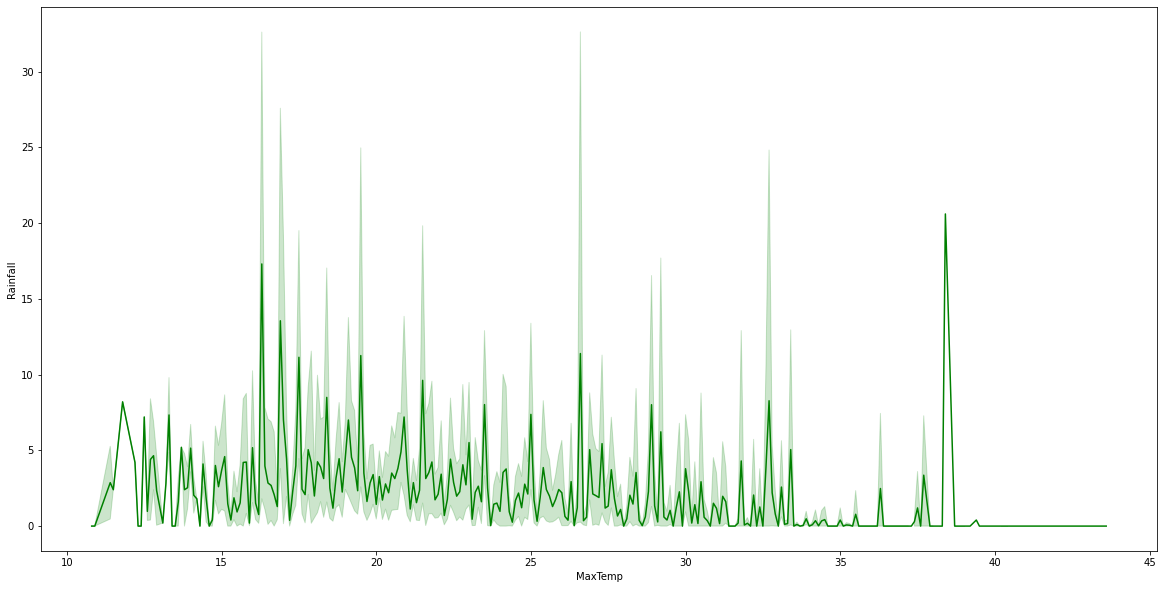

In [85]:
# line plot for maximum temperature and rainfall
plt.figure(figsize=(20,10))
sns.lineplot(data=rainfall_df,x='MaxTemp',y='Rainfall',color='green')

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

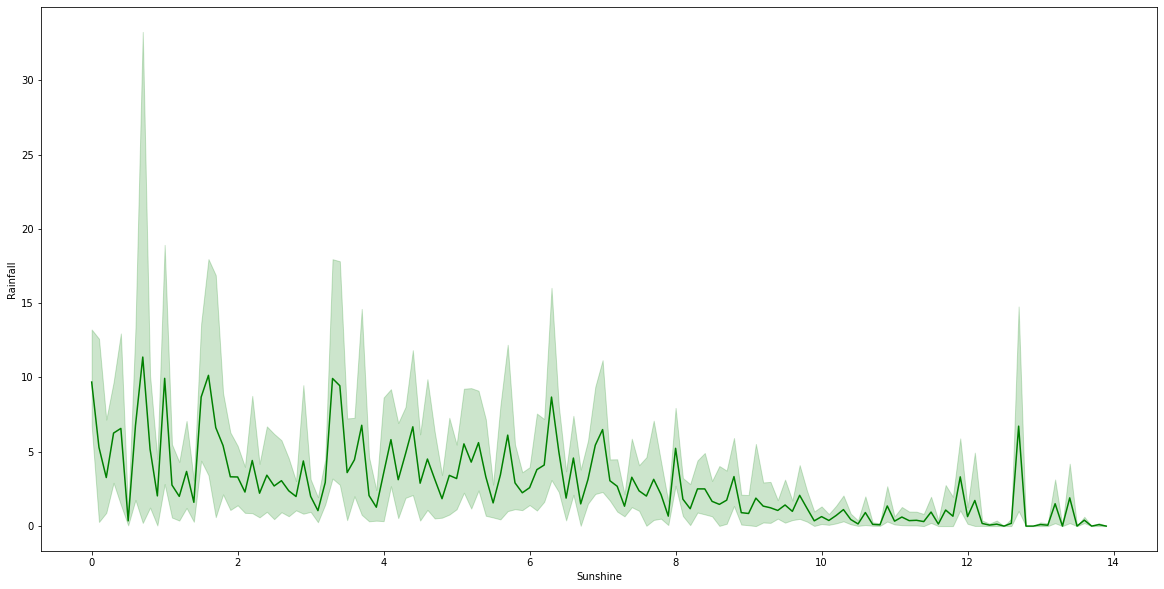

In [86]:
# line plot for sunshine and rainfall
plt.figure(figsize=(20,10))
sns.lineplot(data=rainfall_df,x='Sunshine',y='Rainfall',color='green')

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

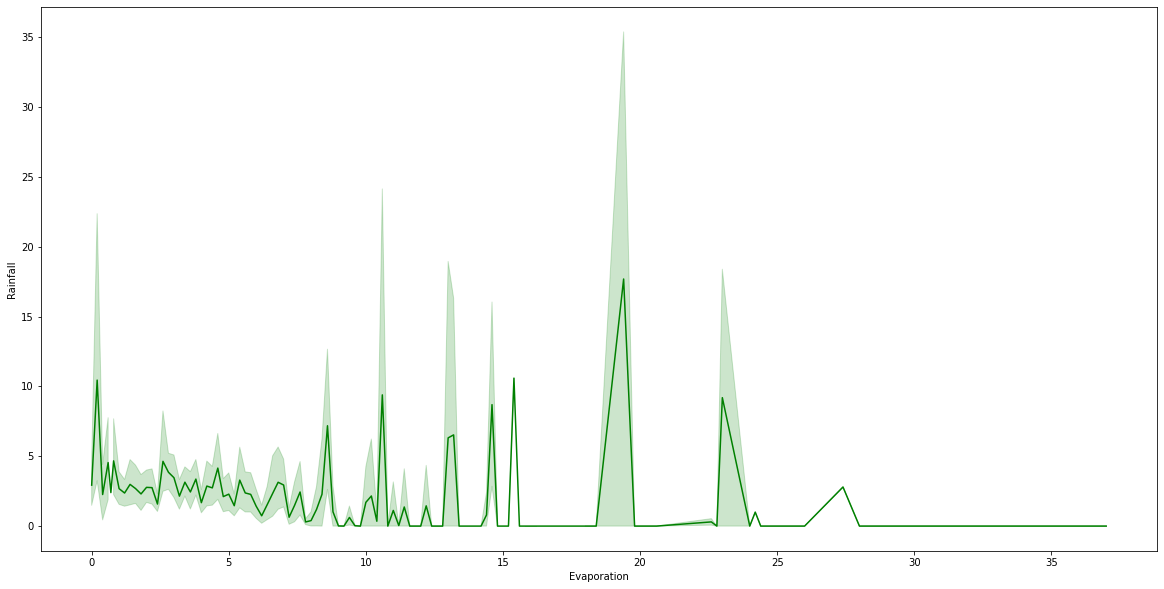

In [87]:
# line plot for Evaporation and rainfall
plt.figure(figsize=(20,10))
sns.lineplot(data=rainfall_df,x='Evaporation',y='Rainfall',color='green')

[]

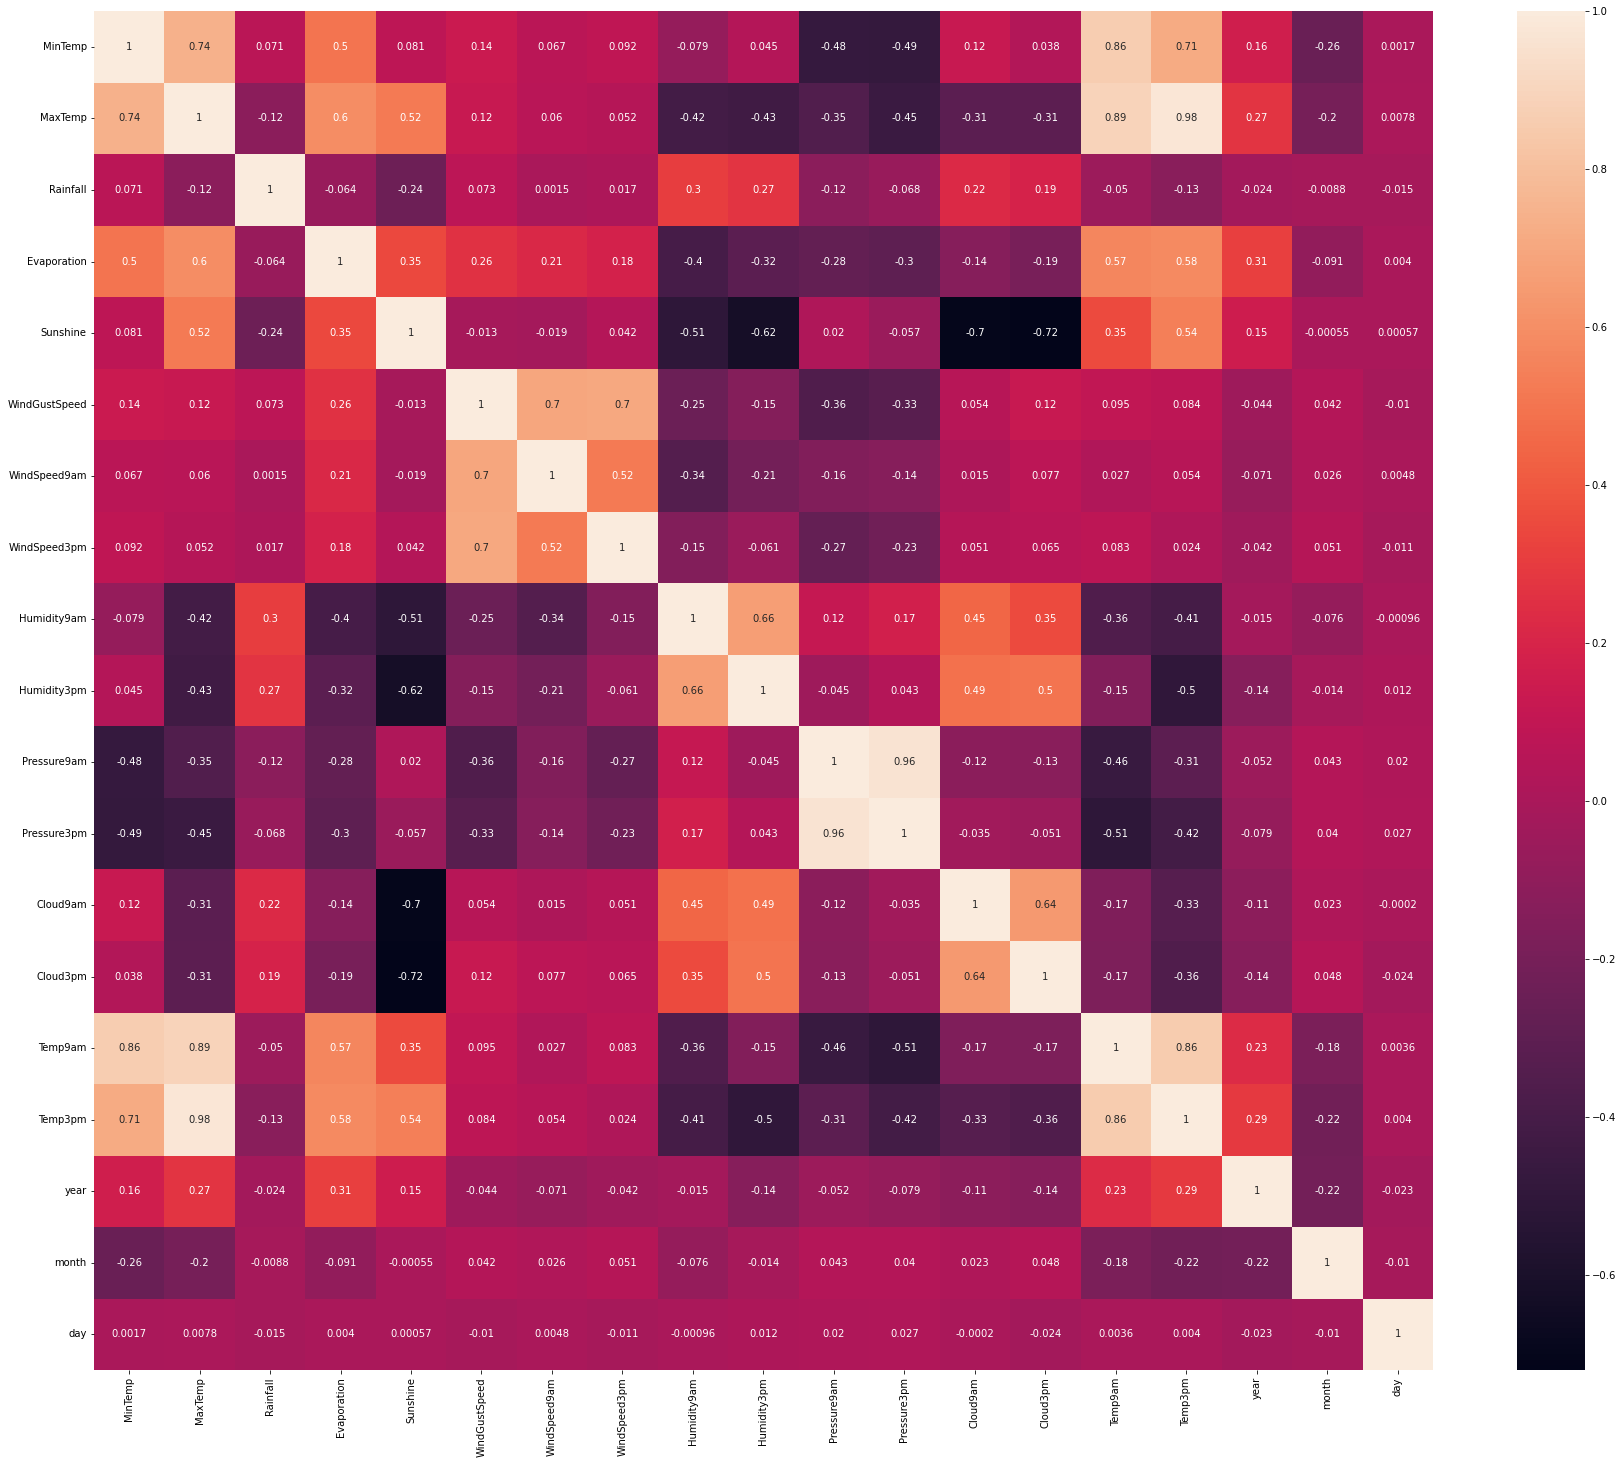

In [88]:
# finding the correlation of all columns to each other
plt.figure(figsize=(30,25))
sns.heatmap(rainfall_df.corr(),annot=True)
plt.plot()

In [114]:
#Replacing the values yes no to 0 1nd 1

def encode_data(feature_name):
    mapping_dict = {}

    unique_values = list(rainfall_df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict
rainfall_df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

rainfall_df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
rainfall_df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

rainfall_df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rainfall_df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rainfall_df['Location'].replace(encode_data('Location'), inplace = True)
pd.set_option('display.max_columns', None)

rainfall_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
907,0,19.8,27.1,24.4,8.6,9.0,0,35.0,0,0,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1,2009,3,10
908,0,18.7,25.6,6.8,3.8,3.4,1,33.0,0,1,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1,2009,3,11
909,0,16.5,25.5,16.8,2.8,6.1,2,19.0,1,0,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0,2009,3,12
910,0,18.5,26.9,0.0,3.2,11.0,3,30.0,0,2,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0,2009,3,13
911,0,18.2,28.2,0.0,6.8,9.0,4,50.0,2,3,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1,2009,3,14


In [95]:
# splitting data
X = rainfall_df.drop(['RainTomorrow'],axis=1)
y = rainfall_df['RainTomorrow']

In [96]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.02622657, 0.02283884, 0.02113323, 0.02537206, 0.02504584,
       0.12901034, 0.0260478 , 0.06468092, 0.02755624, 0.02856593,
       0.02802596, 0.03245441, 0.03114678, 0.17946111, 0.03230794,
       0.03981204, 0.02375747, 0.07758914, 0.0227987 , 0.02098603,
       0.04316917, 0.02082399, 0.02357277, 0.02761674])

<AxesSubplot:>

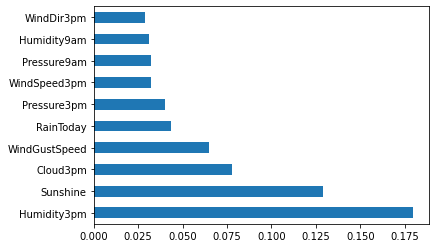

In [98]:
#visualize feature importance values
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [102]:
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [103]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8601583113456465


Here accuracy score is satisfining means model is good 

In [108]:
#A Confusion Matrix is used to summarize the performance of the classification problem. 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[539  34]
 [ 72 113]]


In [117]:
input_data=(0,19.8,27.1,24.4,8.6,9.0,0,35.0,0,0,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,2009,3,10)

# changing input_data to numpy_array
input_data_as_numpy_array=np.asarray(input_data)

#reshaping the data as we are predicting the label for only one instance

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=classifier_logreg.predict(input_data_reshaped)

if(prediction==0):
    print('No Rain tommorrow')
else:
    print("Rain tommorrow")

No Rain tommorrow
